In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    return X

# Function for predicting the response
def predict_y(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit_beta(df,deg):
    return np.linalg.lstsq(create_X(df.x,deg),df.y,rcond=None)[0]

# Function for computing the MSE
def mse(y,yPred):
    return np.mean((y-yPred)**2)

# Loading training, validation and test data
dfTrain = pandas.read_csv('Data_Train.csv')
dfVal = pandas.read_csv('Data_Val.csv')
dfTest = pandas.read_csv('Data_Test.csv')

############ TRAINING A MODEL

# Fitting model
deg = 1
X = create_X(dfTrain.x,deg)
beta = fit_beta(dfTrain,deg)

# Computing training error
yPredTrain = predict_y(dfTrain.x,beta)
err = mse(dfTrain.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))

Training Error = 0.0258
Test Error = 0.0154


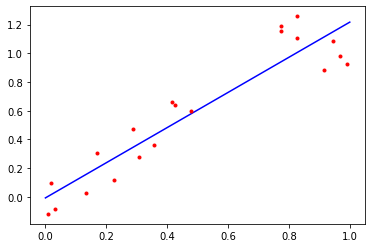

In [2]:
############ PLOTTING FITTED MODEL
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'r.')
plt.show()

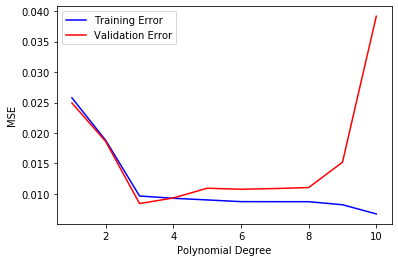

In [22]:
############ HYPER-PARAMETER TUNING

# Initializing range of degree values to be tested and errors
degRange = list(range(1,11))
errTrain = np.zeros(len(degRange))
errVal = np.zeros(len(degRange))

# Computing error as a function of degree
# ...

for i, poly_degree in enumerate(degRange):
    
    X = create_X(dfTrain.x, poly_degree)  # populate polynomial basis space
    beta = fit_beta(dfTrain, poly_degree)  # run leastsquares to find optimal betas
    y_prediction_train = predict_y(dfTrain.x, beta)  # predict y's based off training data
    
    errTrain[i] = mse(dfTrain.y, y_prediction_train) # compare MSE from real y to predicted y(train)
    
    y_prediction_val=predict_y(dfVal.x, beta)  # predict y's based off validate data
    errVal[i] = mse(dfVal.y, y_prediction_val)  # compare MSE from real y to predicted y (validate)
    
    
# Plotting training and validation errors
plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.legend(('Training Error','Validation Error'))
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.show()

In [106]:
############ TRAINING SELECTED MODEL

# Concatenating data training and validation data frames
df = pandas.concat([dfTrain, dfVal])

# Fit model using the optimal degree found in the previous cell
degOpt = degRange[np.argmin(errVal)]  # returns optimal degree using using argmin to return index
# ...

# Compute and print training and test errors
X_opti = create_X(df.x, degOpt)
beta_opti = fit_beta(df, degOpt)
y_pred_opti = predict_y(df.x, beta_opti)

optimal_training_error = mse(df.y, y_pred_opti)

y_pred_opti_test= predict_y(dfTest.x, beta_opti)
optimal_testing_error = mse(dfTest.y, y_pred_opti_test)

print('Training MSE: {0:0.3}\nTest MSE: {1:0.3}'.format(optimal_training_error, optimal_testing_error))


Training MSE: 0.0087
Test MSE: 0.0108


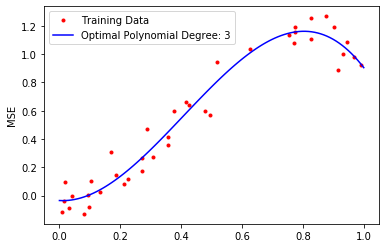

In [115]:
############ PLOTTING FITTED MODEL
# Plot the fitted model as in the second cell
plt.plot(df.x,df.y,'r.', label='Training Data')
plt.plot(x, predict_y(x, beta_opti), 'b-', label=f'Optimal Polynomial Degree: {degOpt}')
plt.ylabel("MSE")
plt.legend()
plt.show()

# ...